In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.6em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: 1em;
text-align:center;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.2em;
line-height:1.2em;
padding-left:1em;
padding-right:3em;
}
</style>
""")

# It's all about Word2Vec

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_1.gif" 
align="middle" alt="Image_1_1" data-canonical-src="" style="width:90%;height:90%">

```
1. Why do we need Word2Vec?

2. What is Word2Vec?

3. Architecture of Word2Vec

4. Components of Word2Vec
    
    4.1 Vocabulary Builder
    
    4.2 Context Builder
    
    4.3 One-hot encoding
    
    4.4 Skip-Gram
    
    4.5 Continuous Bag of Words

5. Math behind Word2Vec

    5.1 Structure Highlights
    
    5.2 Small math example
    
    5.3 Softmax function

    5.4 Error Function

6. Understanding of T-SNE 
    
7. Let's start hands on session


```

## Why do we need Word2Vec?

* Semantics is important...!


* Lexical Semantics and Distributional Semantics


* We are focusing of Distributional Semantics


* Computer cannot do computations on strings


* Strings don’t hold much explicit information themselves.



__Facts:__


* Is Word2Vec having Deep Neural Networks? The answer is: __NO__ 


* It's has only 3 layers...!

## What is Word2Vec?

* Word2Vec is the representation of words in numerical format. 


* Words Vectors are usually dense vector representations


* It generates high-dimensional vector space for words. 



## Architecture of Word2Vec



<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_2.png" 
align="middle" alt="Image_1_2" data-canonical-src="" style="width:80%;height:80%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_3.png" 
align="middle" alt="Image_1_3" data-canonical-src="" style="width:100%;height:100%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

## Main Logic behind Word2Vec

    

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_4.png" 
align="middle" alt="Image_1_4" data-canonical-src="" style="width:100%;height:100%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>


## Components of Word2Vec

### Vocabulary Builder

* It takes input in form of raw sentences and generate vocabulary in form of unique words from sentence.

```
Example: he is a boy

```
* Then Vocabulary Builder builds the vocabulary of four words

* In gensim, Vocabulary builder object has word index and its count.

Populating the interactive namespace from numpy and matplotlib
Word2Vec(vocab=14, size=100, alpha=0.025)
['is', 'sentence', 'for', 'the', 'yet', 'final', 'another', 'and', 'one', 'second', 'this', 'word2vec', 'more', 'first']
[ 9.6209993e-04  1.1460621e-04 -1.7711769e-03  3.3680422e-03
  4.8903595e-03  4.6888622e-03  3.3843378e-03  3.4872207e-03
 -4.7312952e-03  1.8418371e-03  3.5851102e-03  1.2439444e-05
  2.3683887e-03  3.5339796e-03  2.8494007e-03 -4.9129911e-03
  3.4092639e-03  1.2433403e-03 -1.1899451e-03 -4.2076892e-04
  4.0362068e-04 -9.1121887e-04 -3.1746463e-03 -6.7561254e-04
 -3.1773427e-03 -2.8699592e-03  1.1373522e-03  3.4800526e-03
 -3.5573866e-03 -4.0761065e-03  2.2884090e-03 -4.9946909e-03
 -2.4393133e-03  4.8761251e-03  2.9834078e-03  3.5438270e-03
 -2.7117445e-03 -2.2728250e-03 -7.6571357e-04 -1.6194864e-04
  4.8126457e-03  4.8328258e-04 -2.7524051e-04  4.8499787e-03
 -4.2203250e-03  3.9255717e-03  4.7141765e-03  1.7306578e-03
 -2.6565874e-03  8.0700504e-04  1.6679820e

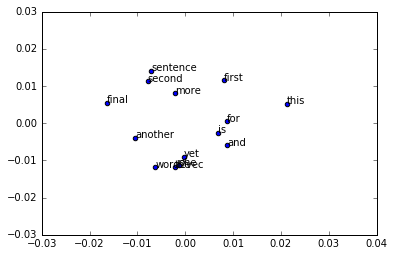

In [37]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%pylab inline
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1,size=100)
#model = gensim.models.Word2Vec(sentences, size=150, window=10, min_count=2, workers=10)

# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])



# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Context Builder

    

* __Context Builder__ is kind of sliding window. It is specified by number and direction


* It's kind of n-gram algorithms.


* It uses output of Vocabulary builder as input.


* Context builder generate word pairs. 


* Note that: If the word is at the beginning or ending of sentence, the window ignores the outer words

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_5.png" 
align="middle" alt="Image_1_5" data-canonical-src="" style="width:100%;height:100%">

In [47]:
# raw sentences is a list of sentences.
corpus_raw = 'he is the king. the king is royal. she is the royal queen' 
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

print('------------Sentences----------')
print(sentences)

data = []
WINDOW_SIZE = 2
for sentence in sentences:
    print('\n')
    print('-----------Word Pairs-------')
    for word_index, word in enumerate(sentence):
        print ("Word:  "+ word)
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                print ([word + ' ------- '+ nb_word])
                data.append([word, nb_word])
#print('\n')
#print('------------Word Pairs in form of list----------')
#print(data)

------------Sentences----------
[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


-----------Word Pairs-------
Word:  he
['he ------- is']
['he ------- the']
Word:  is
['is ------- he']
['is ------- the']
['is ------- king']
Word:  the
['the ------- he']
['the ------- is']
['the ------- king']
Word:  king
['king ------- is']
['king ------- the']


-----------Word Pairs-------
Word:  the
['the ------- king']
['the ------- is']
Word:  king
['king ------- the']
['king ------- is']
['king ------- royal']
Word:  is
['is ------- the']
['is ------- king']
['is ------- royal']
Word:  royal
['royal ------- king']
['royal ------- is']


-----------Word Pairs-------
Word:  she
['she ------- is']
['she ------- the']
Word:  is
['is ------- she']
['is ------- the']
['is ------- royal']
Word:  the
['the ------- she']
['the ------- is']
['the ------- royal']
['the ------- queen']
Word:  royal
['royal ------- is']
['royal ------- the']
['royal -----

### One-hot encoding

* Convert categorical data into binary format. 


* If word is present, then value at that word index is 1 and if not then value at that word index is zero

In [57]:
corpus_raw = 'he is the king the king is royal she is the royal queen' 
words = []
for word in corpus_raw.split(' '):
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
print (words)
words = set(words) # so that all duplicate words are removed
print (words)
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']
{'is', 'the', 'she', 'royal', 'king', 'queen', 'he'}


In [59]:
print(x_train)

[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [55]:
print(y_train)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


### Continuous Bag of Words (CBOW)

  


* This model tries to predict a word based on its neighbours


* CBOW is learning to predict the word by the context. A context may be single word or multiple word for a given target words

__Example:__ The cat jumped over the puddle.

__Input words or Context words:__ {“The”, “cat”, ’over”, “the’, “puddle”}

__Output word or target word:__ We try to predict or generate center word "jumped"


<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_6.png" 
align="middle" alt="Image_1_6" data-canonical-src="" style="width:80%;height:80%">

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_7.png" 
align="middle" alt="Image_1_7" data-canonical-src="" style="width:80%;height:80%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

### Skip-Gram

    

* This model tries to predict the neighbours of a given word

__Example:__ The cat jumped over the puddle.

__Input:__ The center word “jumped”

__Output:__ The model will be able to predict or generate the surrounding words “The”, “cat”, “over”, “the”, “puddle”. 

Here we call the __word “jumped” the context__ and __surrounding words as target words__


<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_8.png" 
align="middle" alt="Image_1_8" data-canonical-src="" style="width:80%;height:80%">

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_9.png" 
align="middle" alt="Image_1_9" data-canonical-src="" style="width:80%;height:80%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

## Math behind Word2Vec

### Structure Highlights



<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_10.png" 
align="middle" alt="Image_1_10" data-canonical-src="" style="width:80%;height:80%">

```

Input Layer:
    One Hot encoded Vector

Hidden Layer:
    Linear Calculation
    
Outpur Layer:
    Softmax
    
```

### Small math example

    

```
Corpus:

the dog saw a cat

the dog chased a cat

the cat climbed a tree

```





__Step 1 : There are total 8 unique words__

`{ the, dog, saw, a, cat, chased, climbed, tree }`

__Step 2 : Arrange them an alphabetical order__

<table style='text-size:14px;text-align:center'>
  <tr>
    <th>Words</th>
    <th>Index</th>
  </tr>
  <tr>
    <td>a</td>
    <td>1</td>
  </tr>
  <tr>
    <td>cat</td>
    <td>2</td>
  </tr>
  <tr>
    <td>chased</td>
    <td>3</td>
  </tr>
  <tr>
    <td>climed</td>
    <td>4</td>
  </tr>
  <tr>
    <td>dog</td>
    <td class="tg-yw4l">5</td>
  </tr>
  <tr>
    <td>saw</td>
    <td>6</td>
  </tr>
  <tr>
    <td>the</td>
    <td>7</td>
  </tr>
  <tr>
    <td>tree</td>
    <td>8</td>
  </tr>
</table>

__Step 3 : Let's define dimension of input and output matrix__

* Size of vocab is = V = 8

* Input matrix = $[ V \times N ] = [ 8 \times 3 ]$

* Output matrix = $[ N \times V ] = [ 3 \times 8 ]$

__Step 4 : Initialize random weight for input and output layer__

__$W_{I}$ = Input layer weight__

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_11.png" 
align="middle" alt="Image_1_11" data-canonical-src="" style="width:40%;height:40%">

__$W_{O}$ = Output layer weight__

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_12.png" 
align="middle" alt="Image_1_12" data-canonical-src="" style="width:80%;height:80%">

__Step 5 : Suppose we want to learn relationship between word 'cat' and 'climbed'__

* Input layer get this input which represent the one-hot encoding for word 'cat' =$ X_{cat}$ =  $[\;0\;1\; 0\; 0\; 0\; 0\; 0\; 0\;]$

* Weight of input layer is: 

* Perform $X_{cat} \times W_{I} = [\;0\;1\; 0\; 0\; 0\; 0\; 0\; 0\;] \; \times \;$ $\left[\begin{array}
{rrr}
-0.094491 & -0.443977 & 0.313917 \\
-0.490796 & -0.229903 & 0.06546  \\
 0.072921 & 0.172246 & -0.357751 \\
 0.104514 & -0.463000 & 0.079367 \\
-0.226080 & -0.154659 & -0.038422 \\
 0.406115 & -0.192794 & -0.441992 \\
 0.181755 & 0.088268 & 0.277574 \\
-0.055334 & 0.491792 & 0.263102 
\end{array}\right]$



* __So final output of hidden layer__

 $H_{output} = W_{I_{2^{nd\; row}}}$ = $[-0.490796 \; -0.229903 \;0.06546 ]$

__Step 6 : Now let's perform matrix multiplication of $WI_{2^{nd\;element}} \times WO_{[3 \times 8]}$ OR $H_{output} \times WO_{[3 \times 8]}$ __

__Perform $H_{Output} \times W_{O} = $__

$\left[\begin{smallmatrix}-0.490796& -0.229903 & 0.06546 \end{smallmatrix}\right] \; \times \;$ $ \left[\begin{smallmatrix}
 0.023074 & 0.479901	&0.432148	&0.37548	&0.364732	&-0.11984&	0.26607	&-0.351 \\
-0.368008 &	0.424778	&-0.257104	&-0.148817	&0.033922	&0.353574	&-0.144942	&0.130904 \\
 0.422434	&0.364503	&0.467865	&-0.020302	&-0.438777	&-0.438777	&0.268529	&-0.446787 
\end{smallmatrix}\right]$


<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_13.png" 
align="middle" alt="Image_1_13" data-canonical-src="" style="width:80%;height:80%">

__Output layer generate this result__

$H_{} \times W_{O}$ = $\left[\begin{matrix} 0.100934	&-0.309330	&-0.122361&	-0.151399	&-0.215530	&-0.051193	&-0.0796855	&0.1129275 \end{matrix}\right]$

__We need Probability of the target word with respect to given context word __ 

* Context word is 'cat'

* Target word is 'climbed'

### Softmax function

    

$$ y_{j} = Probability\;(word_{j}\; | \;Word_{context}) = \frac {exp(u_{j})}{\sum_{j^{'}=1}^V exp(u_{j})}$$

In [15]:
import numpy as np

def stablesoftmax(x):
    shiftx = x - np.max(x)
    #print (np.max(x))
    #print (shiftx)
    exps = np.exp(shiftx)
    #print (exps)
    #print (np.sum(exps))
    print ('\n Softmax Probability \n')
    print(exps / np.sum(exps))
    print ("\nError with repect to 'climbed' word\n ")
    return ([0,0,1,0,0,0,0,0] - (exps / np.sum(exps)))

print (stablesoftmax([0.100934,-0.309330,-0.122361,-0.151399,-0.215530,-0.051193,-0.0796855,0.1129275]))


 Softmax Probability 

[0.14981814 0.0994006  0.11983637 0.11640659 0.10917566 0.12867569
 0.12506113 0.15162581]

Error with repect to 'climbed' word
 
[-0.14981814 -0.0994006   0.88016363 -0.11640659 -0.10917566 -0.12867569
 -0.12506113 -0.15162581]


### Error Function

### Gradient Descent

## Understanding of T-SNE 



## Let's start hands on session

__Reading Sources:__




__Research Papers:__

* [Original Word2Vec Paper by Google](https://arxiv.org/pdf/1301.3781.pdf)

* [word2vec Parameter Learning Explained](https://arxiv.org/pdf/1411.2738.pdf)

* [How exactly does word2vec work?](http://www.1-4-5.net/~dmm/ml/how_does_word2vec_work.pdf)

* [word2vec gradients](https://courses.cs.ut.ee/MTAT.03.277/2015_fall/uploads/Main/word2vec.pdf)

* [Backpropagation in Woed2Vec](http://www.claudiobellei.com/2018/01/06/backprop-word2vec/)

* [Cross Entropy Error](https://visualstudiomagazine.com/articles/2014/04/01/neural-network-cross-entropy-error.aspx)






__Commonly asked math based question for Word2Vec__

* [Gradient Decent Steps](https://datascience.stackexchange.com/questions/5615/gradient-descent-step-for-word2vec-negative-sampling)

* [Word2Vec Tutorial](http://mccormickml.com/assets/word2vec/Alex_Minnaar_Word2Vec_Tutorial_Part_I_The_Skip-Gram_Model.pdf)

* [Gradient Decent Steps](https://stats.stackexchange.com/questions/134149/is-the-gradient-computation-in-the-word2vec-implementation-actually-wrong)



__Fun Web interfaces for Word2Vec__


* [twitter Word2vec](https://embeddings.macheads101.com/)
* [Wevi by Xin Rong](https://ronxin.github.io/wevi/)
    

Reading Resources(RNN)



https://www.youtube.com/channel/UCeqlHZDmUEQQHYqnei8doYg/playlists


0.10093404596	-0.30933086135	-0.12236108599599999	-0.151399576249	-0.215530118658	-0.051193073102	-0.07968558275399999	0.112927496668




A1	A2	A3
1	-0.490796	-0.229903	0.06546
Matrix B

B1	B2	B3	B4	B5	B6	B7	B8
1	0.023074	0.479901	0.432148	0.37548	0.364732	-0.11984	0.26607	-0.351
2	-0.368008	0.424778	-0.257104	-0.148817	0.033922	0.353574	-0.144942	0.130904
3	0.422434	0.364503	0.467865	-0.020302	-0.438777	-0.438777	0.268529	-0.446787